In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline


# various options in pandas
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 400)
pd.set_option('display.precision', 3)

In [5]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = [] #empty list to input weekly turnstile data into
    for week_num in week_nums:
        # concat our week onto url.. 
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [170429, 170506, 170513, 170520, 170527]
df = get_data(week_nums)
df.rename(columns=lambda x: x.strip(), inplace = True)
#df.head(2)

In [14]:
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " +df.TIME, format="%m/%d/%Y %H:%M:%S")
#df.head(3)

In [15]:
#calc time diff
df['TIMEDIFF'] = df['DATE_TIME'].diff()
mask = df.UNIT != df.UNIT.shift(1)
mask2 = df.SCP != df.SCP.shift(1)
df['TIMEDIFF'][mask] = np.nan
df['TIMEDIFF'][mask2] = np.nan

/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
df.TIMEDIFF.value_counts() #check counts

0 days 04:00:00    880786
0 days 04:12:00     60565
0 days 08:00:00      2127
0 days 04:26:00       717
0 days 00:01:20       370
0 days 12:00:00       214
0 days 00:01:21       198
0 days 16:00:00       127
0 days 00:01:33        75
0 days 04:11:59        68
0 days 00:01:41        59
0 days 00:01:07        59
0 days 20:00:00        54
0 days 00:01:25        53
0 days 00:01:31        47
0 days 00:01:22        45
0 days 00:01:05        44
0 days 00:01:36        42
0 days 00:01:15        37
0 days 00:00:26        37
0 days 00:01:19        35
0 days 00:01:14        35
0 days 01:44:21        33
0 days 00:01:18        32
0 days 03:59:59        31
0 days 03:59:34        30
0 days 00:01:23        29
0 days 00:01:24        28
0 days 00:57:10        28
0 days 00:01:58        28
0 days 01:11:54        28
0 days 00:05:31        27
0 days 00:01:13        26
0 days 02:02:09        26
2 days 04:00:00        25
0 days 00:09:58        25
0 days 00:01:06        24
0 days 00:01:03        24
0 days 00:01

In [18]:
df['HRSDIFF'] = df['TIMEDIFF'].apply(lambda row: int(row.seconds/3600) if not pd.isnull(row) else row) #convert to hrs
df.HRSDIFF.value_counts()#check counts

4     943315
0       4435
1       2277
8       2152
2       2114
3       1764
12       219
16       134
20        58
5         37
7         32
10        29
6         21
9         12
23         9
14         7
15         4
17         4
11         4
13         3
19         3
22         2
21         2
18         1
Name: HRSDIFF, dtype: int64

In [19]:
df = df[df.HRSDIFF <= 4] #filter out anything greater than 4 hrs
df.HRSDIFF.value_counts() #check counts

4    943315
0      4435
1      2277
2      2114
3      1764
Name: HRSDIFF, dtype: int64

In [21]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['DAY_OF_WK'] = df['DATE'].dt.weekday_name
df['DAY_OF_WK_N'] = df['DATE'].dt.weekday
df.head()

/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DELTA_EXITS,DELTA_ENTRIES,DATE_TIME,TIMEDIFF,HRSDIFF,DAY_OF_WK,DAY_OF_WK_N
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,04:00:00,REGULAR,6148080,2082123,3.0,55.0,2017-04-22 04:00:00,04:00:00,4,Saturday,5
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,08:00:00,REGULAR,6148101,2082157,34.0,21.0,2017-04-22 08:00:00,04:00:00,4,Saturday,5
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,12:00:00,REGULAR,6148224,2082251,94.0,123.0,2017-04-22 12:00:00,04:00:00,4,Saturday,5
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,16:00:00,REGULAR,6148524,2082316,65.0,300.0,2017-04-22 16:00:00,04:00:00,4,Saturday,5
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,20:00:00,REGULAR,6148910,2082368,52.0,386.0,2017-04-22 20:00:00,04:00:00,4,Saturday,5


In [22]:
#sort strings in 'linename'

df['LINESORT'] = df.LINENAME.apply(sorted)

/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
df['LINESORT'] = df.LINESORT.apply(''.join)
df['STAT_MERGE'] = df['STATION'] + '-' + df['LINESORT']
#df[df['DAY_OF_WK'] == 'Monday'].head(2)
df.head()

/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DELTA_EXITS,DELTA_ENTRIES,DATE_TIME,TIMEDIFF,HRSDIFF,DAY_OF_WK,DAY_OF_WK_N,LINESORT,STAT_MERGE
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,04:00:00,REGULAR,6148080,2082123,3.0,55.0,2017-04-22 04:00:00,04:00:00,4,Saturday,5,456NQRW,59 ST-456NQRW
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,08:00:00,REGULAR,6148101,2082157,34.0,21.0,2017-04-22 08:00:00,04:00:00,4,Saturday,5,456NQRW,59 ST-456NQRW
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,12:00:00,REGULAR,6148224,2082251,94.0,123.0,2017-04-22 12:00:00,04:00:00,4,Saturday,5,456NQRW,59 ST-456NQRW
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,16:00:00,REGULAR,6148524,2082316,65.0,300.0,2017-04-22 16:00:00,04:00:00,4,Saturday,5,456NQRW,59 ST-456NQRW
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,20:00:00,REGULAR,6148910,2082368,52.0,386.0,2017-04-22 20:00:00,04:00:00,4,Saturday,5,456NQRW,59 ST-456NQRW


In [24]:
#calculate change in entries
df['DELTA_ENTRIES'] = df['ENTRIES'].diff()
mask = df.UNIT != df.UNIT.shift(1)
mask2 = df.SCP != df.SCP.shift(1)
df['DELTA_ENTRIES'][mask] = np.nan
df['DELTA_ENTRIES'][mask2] = np.nan

#df.head(3)

/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/krw252/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/krw252/anaconda/lib/

In [25]:
#calculate change in exits
df['DELTA_EXITS'] = df['EXITS'].diff()
mask = df.UNIT != df.UNIT.shift(1)
mask2 = df.SCP != df.SCP.shift(1)
df['DELTA_EXITS'][mask] = np.nan
df['DELTA_EXITS'][mask2] = np.nan

#df.head(3)

/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/krw252/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/krw252/anaconda/lib/

In [26]:
df = df[df.DESC == 'REGULAR']
df.head(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DELTA_EXITS,DELTA_ENTRIES,DATE_TIME,TIMEDIFF,HRSDIFF,DAY_OF_WK,DAY_OF_WK_N,LINESORT,STAT_MERGE
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,04:00:00,REGULAR,6148080,2082123,NaN,NaN,2017-04-22 04:00:00,04:00:00,4,Saturday,5,456NQRW,59 ST-456NQRW
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,08:00:00,REGULAR,6148101,2082157,34.0,21.0,2017-04-22 08:00:00,04:00:00,4,Saturday,5,456NQRW,59 ST-456NQRW
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,12:00:00,REGULAR,6148224,2082251,94.0,123.0,2017-04-22 12:00:00,04:00:00,4,Saturday,5,456NQRW,59 ST-456NQRW


In [27]:
df.DESC.value_counts()

REGULAR    953905
Name: DESC, dtype: int64

In [28]:
#account for backcounting units
df['DELTA_ENTRIES'] = abs(df['DELTA_ENTRIES'])
df['DELTA_EXITS'] = abs(df['DELTA_EXITS'])

In [29]:
#account for super high counts due to bad data or counter resets
df.sort_values(by ='DELTA_ENTRIES', ascending = False,inplace=True)
df_filt = df[df.DELTA_ENTRIES < 5000]
df_filt = df_filt[df_filt.DELTA_EXITS < 5000]

df_filt.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DELTA_EXITS,DELTA_ENTRIES,DATE_TIME,TIMEDIFF,HRSDIFF,DAY_OF_WK,DAY_OF_WK_N,LINESORT,STAT_MERGE
10243,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2017-05-24,10:33:56,REGULAR,2429111,1925681,2172.0,4902.0,2017-05-24 10:33:56,02:32:55,2,Wednesday,2,1RW,WHITEHALL S-FRY-1RW
151276,R240,R047,00-00-01,GRD CNTRL-42 ST,4567S,IRT,2017-05-24,01:00:00,REGULAR,79374,81698,1365.0,4591.0,2017-05-24 01:00:00,04:00:00,4,Wednesday,2,4567S,GRD CNTRL-42 ST-4567S
151834,R238,R046,00-03-02,GRD CNTRL-42 ST,4567S,IRT,2017-05-10,20:00:00,REGULAR,28652861,8757415,16.0,4481.0,2017-05-10 20:00:00,04:00:00,4,Wednesday,2,4567S,GRD CNTRL-42 ST-4567S
128664,R138,R293,00-00-04,34 ST-PENN STA,123ACE,IRT,2017-05-25,18:00:00,REGULAR,17396517,8182957,1516.0,4349.0,2017-05-25 18:00:00,04:00:00,4,Thursday,3,123ACE,34 ST-PENN STA-123ACE
151196,R238,R046,00-03-02,GRD CNTRL-42 ST,4567S,IRT,2017-05-16,20:00:00,REGULAR,28683723,8769962,31.0,4310.0,2017-05-16 20:00:00,04:00:00,4,Tuesday,1,4567S,GRD CNTRL-42 ST-4567S


In [30]:
df_filt.sort_values(by ='DELTA_EXITS', ascending = False,inplace=True)
df_filt.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DELTA_EXITS,DELTA_ENTRIES,DATE_TIME,TIMEDIFF,HRSDIFF,DAY_OF_WK,DAY_OF_WK_N,LINESORT,STAT_MERGE
95296,N519,R461,00-00-00,B'WAY-LAFAYETTE,BDFQ6,IND,2017-05-23,21:00:00,REGULAR,362696,982522,4953.0,1926.0,2017-05-23 21:00:00,04:00:00,4,Tuesday,1,6BDFQ,B'WAY-LAFAYETTE-6BDFQ
49024,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2017-05-22,20:00:00,REGULAR,16459422,57736969,4888.0,68.0,2017-05-22 20:00:00,04:00:00,4,Monday,0,1237ACENQRSW,42 ST-PORT AUTH-1237ACENQRSW
153200,R238,R046,00-03-00,GRD CNTRL-42 ST,4567S,IRT,2017-04-26,12:00:00,REGULAR,13464905,4960372,4876.0,677.0,2017-04-26 12:00:00,04:00:00,4,Wednesday,2,4567S,GRD CNTRL-42 ST-4567S
153206,R238,R046,00-03-00,GRD CNTRL-42 ST,4567S,IRT,2017-04-27,12:00:00,REGULAR,13469687,4973876,4870.0,705.0,2017-04-27 12:00:00,04:00:00,4,Thursday,3,4567S,GRD CNTRL-42 ST-4567S
153194,R238,R046,00-03-00,GRD CNTRL-42 ST,4567S,IRT,2017-04-25,12:00:00,REGULAR,13462328,4945957,4868.0,656.0,2017-04-25 12:00:00,04:00:00,4,Tuesday,1,4567S,GRD CNTRL-42 ST-4567S


In [ ]:
#station = df_filt.groupby(['DAY_OF_WK']).agg({'DELTA_ENTRIES' : sum, 'DELTA_EXITS' :sum})
#station.sort_values('DELTA_ENTRIES',ascending = False)

In [ ]:
#full = df_filt.groupby(['DATE_TIME']).DELTA_EXITS.mean() #by date time

In [ ]:
#x = np.array([x for x in range(len(station))])
#y = np.array(full)
#plt.xticks(x, my_xticks)
#plt.bar(x, y)

<Container object of 7 artists>

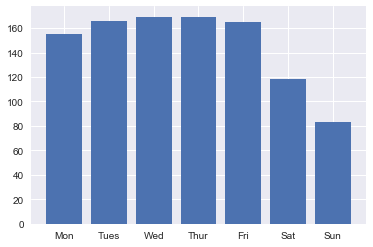

In [31]:
day_wk = df_filt.groupby(['DAY_OF_WK_N']).DELTA_EXITS.mean() #define day of week groups
x = np.array([0,1,2,3,4,5,6])
y = np.array(day_wk)
my_xticks = ['Mon', 'Tues', 'Wed','Thur','Fri', 'Sat', 'Sun']
plt.xticks(x, my_xticks)
plt.bar(x, y)

In [92]:
station = df_filt.groupby(['STAT_MERGE']).DELTA_EXITS.sum().sort_values(ascending=False).head(20)
stat_array = station.index.values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

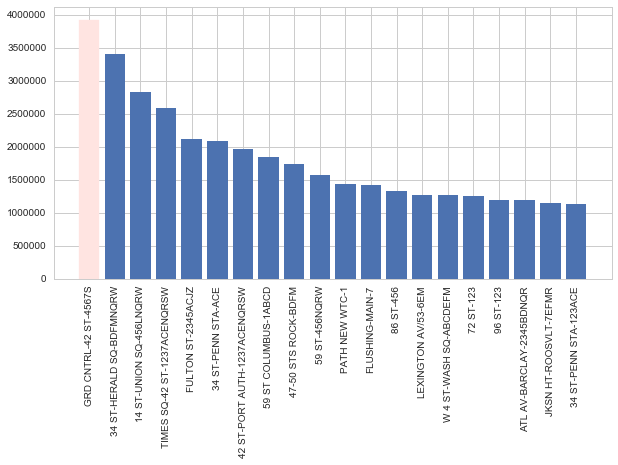

In [104]:
import pylab as pl
from matplotlib import colors as mcolors

plt.figure(figsize = (10,5))
x = np.array([x for x in range(len(station))])
y = np.array(station)
my_xticks = stat_array
plt.xticks(x, my_xticks)
plot = plt.bar(x, y)
plot[0].set_color('mistyrose')
pl.xticks(rotation = 'vertical')


In [45]:
#break time of day into segments
def get_time_of_day(string):
    hour = int(string.split(":")[0])
    if hour <= 21 and hour > 17:
        tod = "Evening"
    elif hour <= 17 and hour > 13:
        tod = "Afternoon"
    elif hour <= 13 and hour > 9:
        tod = "Morning"
    elif hour <= 9 and hour > 5:
        tod = "Dawn"
    else:
        tod = 'Night'
    return tod

df_filt["TIMEOFDAY"] = df_filt["TIME"].apply(lambda row: get_time_of_day(row))
#b = df_filt.groupby(["UNIT","STATION", "DAY_OF_WK", "TIME"]).agg({"DELTA_EXITS" : sum})
#b.sort_values(by="DELTA_EXITS", ascending=False)

In [46]:
#rank categorical
#df_filt['DAY_OF_WK'] = pd.Categorical(df_filt['DAY_OF_WK'], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
#df_filt['TIMEOFDAY'] = pd.Categorical(df_filt['TIMEOFDAY'], ['Dawn','Night', 'Evening','Afternoon','Morning'])

df_filt.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DELTA_EXITS,DELTA_ENTRIES,DATE_TIME,TIMEDIFF,HRSDIFF,DAY_OF_WK,DAY_OF_WK_N,LINESORT,STAT_MERGE,TIMEOFDAY
95296,N519,R461,00-00-00,B'WAY-LAFAYETTE,BDFQ6,IND,2017-05-23,21:00:00,REGULAR,362696,982522,4953.0,1926.0,2017-05-23 21:00:00,04:00:00,4,Tuesday,1,6BDFQ,B'WAY-LAFAYETTE-6BDFQ,Evening
49024,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2017-05-22,20:00:00,REGULAR,16459422,57736969,4888.0,68.0,2017-05-22 20:00:00,04:00:00,4,Monday,0,1237ACENQRSW,42 ST-PORT AUTH-1237ACENQRSW,Evening
153200,R238,R046,00-03-00,GRD CNTRL-42 ST,4567S,IRT,2017-04-26,12:00:00,REGULAR,13464905,4960372,4876.0,677.0,2017-04-26 12:00:00,04:00:00,4,Wednesday,2,4567S,GRD CNTRL-42 ST-4567S,Morning
153206,R238,R046,00-03-00,GRD CNTRL-42 ST,4567S,IRT,2017-04-27,12:00:00,REGULAR,13469687,4973876,4870.0,705.0,2017-04-27 12:00:00,04:00:00,4,Thursday,3,4567S,GRD CNTRL-42 ST-4567S,Morning
153194,R238,R046,00-03-00,GRD CNTRL-42 ST,4567S,IRT,2017-04-25,12:00:00,REGULAR,13462328,4945957,4868.0,656.0,2017-04-25 12:00:00,04:00:00,4,Tuesday,1,4567S,GRD CNTRL-42 ST-4567S,Morning


In [ ]:
#test heat map on one train line
#nqr_59 = df_filt[df_filt['STAT_MERGE'] == '59 ST-NQR456W']
#mask = ['STAT_MERGE','C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','TIME','DESC','ENTRIES','DATE_TIME','DAY_OF_WK_N','EXITS','DELTA_ENTRIES']
#nqr_59.drop(mask,axis=1,inplace=True)
#nqr_59.head()

In [ ]:
#nqr_59['DAY_OF_WK'] = pd.Categorical(nqr_59['DAY_OF_WK'], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
#nqr_59['TIMEOFDAY'] = pd.Categorical(nqr_59['TIMEOFDAY'], ['Dawn','Night', 'Evening','Afternoon','Morning'])

# Load pivot of mean EXITS by TIMEGROUP, DAY_OF_WK
#exits_test = nqr_59.pivot_table(index = "TIMEOFDAY", columns = "DAY_OF_WK", values = "DELTA_EXITS")

# Draw a heatmap with the numeric values in each cell
#f, ax = plt.subplots(figsize=(9, 6))
#sns.heatmap(exits_test, annot=True, linewidths=.5, ax=ax,square=True)

In [ ]:
#exits = df_filt.pivot_table(index = "TIMEOFDAY", columns = "DAY_OF_WK", values = "DELTA_EXITS",aggfunc='sum')

# Draw a heatmap with the numeric values in each cell
#f, ax = plt.subplots(figsize=(9, 6))
#sns.heatmap(exits, annot=False, fmt="n", linewidths=.5, ax=ax,square=True, cmap='PuBu')


In [47]:
grouped_d = df_filt.groupby(["STAT_MERGE", 'DATE',"DAY_OF_WK", "TIMEOFDAY"], as_index=False).agg({'DELTA_EXITS' : sum})
grouped_d.head(15)
#len(grouped_d)

,STAT_MERGE,DATE,DAY_OF_WK,TIMEOFDAY,DELTA_EXITS
0,1 AV-L,2017-04-22,Saturday,Afternoon,5019.0
1,1 AV-L,2017-04-22,Saturday,Dawn,935.0
2,1 AV-L,2017-04-22,Saturday,Evening,6051.0
3,1 AV-L,2017-04-22,Saturday,Morning,3412.0
4,1 AV-L,2017-04-23,Sunday,Afternoon,3897.0
5,1 AV-L,2017-04-23,Sunday,Dawn,641.0
6,1 AV-L,2017-04-23,Sunday,Evening,4499.0
7,1 AV-L,2017-04-23,Sunday,Morning,2368.0
8,1 AV-L,2017-04-23,Sunday,Night,5450.0
9,1 AV-L,2017-04-24,Monday,Afternoon,3987.0


In [48]:
grouped_d[(grouped_d['STAT_MERGE'] == '1 AV-L') & (grouped_d['DAY_OF_WK'] == 'Monday') & (grouped_d['TIMEOFDAY'] == 'Morning')]

,STAT_MERGE,DATE,DAY_OF_WK,TIMEOFDAY,DELTA_EXITS
12,1 AV-L,2017-04-24,Monday,Morning,5700.0
46,1 AV-L,2017-05-01,Monday,Morning,5656.0
80,1 AV-L,2017-05-08,Monday,Morning,5638.0
114,1 AV-L,2017-05-15,Monday,Morning,6128.0
148,1 AV-L,2017-05-22,Monday,Morning,5753.0


In [49]:
grouped_means = grouped_d.groupby(["STAT_MERGE","DAY_OF_WK", "TIMEOFDAY"], as_index=False).DELTA_EXITS.mean()
grouped_means.head(20)
#len(grouped_means)

,STAT_MERGE,DAY_OF_WK,TIMEOFDAY,DELTA_EXITS
0,1 AV-L,Friday,Afternoon,4540.2
1,1 AV-L,Friday,Dawn,3323.0
2,1 AV-L,Friday,Evening,6854.8
3,1 AV-L,Friday,Morning,5767.6
4,1 AV-L,Friday,Night,4192.6
5,1 AV-L,Monday,Afternoon,3983.8
6,1 AV-L,Monday,Dawn,3449.2
7,1 AV-L,Monday,Evening,6281.0
8,1 AV-L,Monday,Morning,5775.0
9,1 AV-L,Monday,Night,2317.4


In [44]:
## Our original way of grouping top stations by exits by day times

#grouped_d = df_filt.groupby(["STAT_MERGE", "DAY_OF_WK", "TIMEOFDAY"], as_index=False).agg({"DELTA_EXITS" : sum})

#def top_five(df_filt):
#    days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
#    times = ['Dawn', 'Morning', 'Afternoon', 'Evening', 'Night']
#    for day in days:
#        for time in times:
#            mask = ((df_filt['DAY_OF_WK'] == day) & (df_filt['TIMEOFDAY'] == time))
#            temp_df = df_filt[mask].sort_values(by = ['DELTA_EXITS'], ascending = False).reset_index()
#            print(day, time,'\n', temp_df.head())
#			
#top_five(grouped_d)

In [50]:
hubs_mask = ((df_filt.STAT_MERGE == 'GRD CNTRL-42 ST-4567S') | 
                (df_filt.STAT_MERGE == 'TIMES SQ-42 ST-1237ACENQRSW') | 
                (df_filt.STAT_MERGE == '42 ST-PORT AUTH-1237ACENQRSW') |
                (df_filt.STAT_MERGE == '34 ST-PENN STA-ACE') |
                (df_filt.STAT_MERGE == '34 ST-PENN STA-123ACE') |
                (df_filt.STAT_MERGE == '42 ST-PORT AUTH-1237ACEGNRSW'))
no_hubs = df_filt.drop(df_filt[hubs_mask].index)
hubs = df_filt[hubs_mask]
#hubs.head()
no_hubs.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DELTA_EXITS,DELTA_ENTRIES,DATE_TIME,TIMEDIFF,HRSDIFF,DAY_OF_WK,DAY_OF_WK_N,LINESORT,STAT_MERGE,TIMEOFDAY
95296,N519,R461,00-00-00,B'WAY-LAFAYETTE,BDFQ6,IND,2017-05-23,21:00:00,REGULAR,362696,982522,4953.0,1926.0,2017-05-23 21:00:00,04:00:00,4,Tuesday,1,6BDFQ,B'WAY-LAFAYETTE-6BDFQ,Evening
10473,A060,R001,00-00-05,WHITEHALL S-FRY,R1W,BMT,2017-05-24,10:33:56,REGULAR,1461675,1724877,4499.0,3918.0,2017-05-24 10:33:56,02:32:55,2,Wednesday,2,1RW,WHITEHALL S-FRY-1RW,Morning
40780,N009,R174,01-00-02,181 ST,A,IND,2017-05-10,21:00:00,REGULAR,8994717,14849124,4411.0,3012.0,2017-05-10 21:00:00,04:00:00,4,Wednesday,2,A,181 ST-A,Evening
94315,N506,R022,00-00-00,34 ST-HERALD SQ,BDFMNQRW,IND,2017-04-25,20:00:00,REGULAR,5168907,8372564,4313.0,2278.0,2017-04-25 20:00:00,04:00:00,4,Tuesday,1,BDFMNQRW,34 ST-HERALD SQ-BDFMNQRW,Evening
120868,PTH21,R540,01-00-00,PATH WTC 2,1,PTH,2017-05-03,10:29:17,REGULAR,40117,243921,4249.0,102.0,2017-05-03 10:29:17,04:12:00,4,Wednesday,2,1,PATH WTC 2-1,Morning
120326,PTH21,R540,01-00-00,PATH WTC 2,1,PTH,2017-05-10,10:29:17,REGULAR,47385,288711,4102.0,92.0,2017-05-10 10:29:17,04:12:00,4,Wednesday,2,1,PATH WTC 2-1,Morning
119595,PTH21,R540,01-00-00,PATH WTC 2,1,PTH,2017-05-23,11:18:12,REGULAR,1095,12477,4048.0,80.0,2017-05-23 11:18:12,04:12:00,4,Tuesday,1,1,PATH WTC 2-1,Morning
146756,R216,R322,01-00-02,SPRING ST,6,IRT,2017-05-03,20:00:00,REGULAR,1948786,11982798,3951.0,535.0,2017-05-03 20:00:00,04:00:00,4,Wednesday,2,6,SPRING ST-6,Evening
119807,PTH21,R540,01-00-00,PATH WTC 2,1,PTH,2017-05-17,10:19:03,REGULAR,54381,330612,3940.0,82.0,2017-05-17 10:19:03,04:12:00,4,Wednesday,2,1,PATH WTC 2-1,Morning
187334,R610,R057,00-03-00,ATL AV-BARCLAY,2345BDNQR,IRT,2017-05-10,20:00:00,REGULAR,4607959,28935093,3861.0,69.0,2017-05-10 20:00:00,04:00:00,4,Wednesday,2,2345BDNQR,ATL AV-BARCLAY-2345BDNQR,Evening


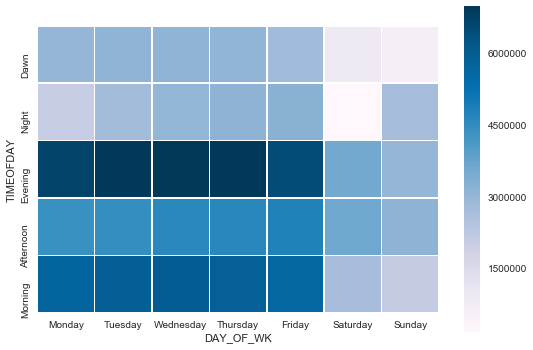

In [51]:
#rank categorical
df_filt['DAY_OF_WK'] = pd.Categorical(df_filt['DAY_OF_WK'], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
df_filt['TIMEOFDAY'] = pd.Categorical(df_filt['TIMEOFDAY'], ['Dawn','Night', 'Evening','Afternoon','Morning'])

exits = df_filt.pivot_table(index = "TIMEOFDAY", columns = "DAY_OF_WK", values = "DELTA_EXITS",aggfunc='sum')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(exits, annot=False, fmt="n", linewidths=.5, ax=ax,square=True, cmap='PuBu')

/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


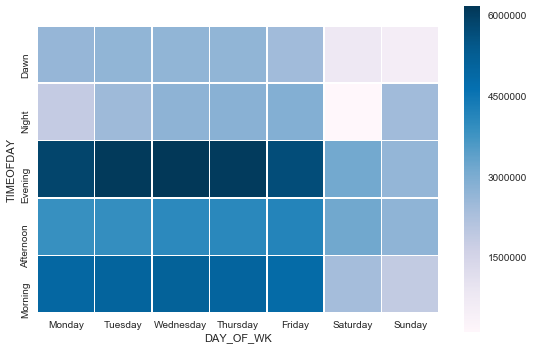

In [52]:
#rank categorical
no_hubs['DAY_OF_WK'] = pd.Categorical(no_hubs['DAY_OF_WK'], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
no_hubs['TIMEOFDAY'] = pd.Categorical(no_hubs['TIMEOFDAY'], ['Dawn','Night', 'Evening','Afternoon','Morning'])

exits = no_hubs.pivot_table(index = "TIMEOFDAY", columns = "DAY_OF_WK", values = "DELTA_EXITS",aggfunc='sum')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(exits, annot=False, fmt="n", linewidths=.5, ax=ax,square=True, cmap='PuBu')

/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


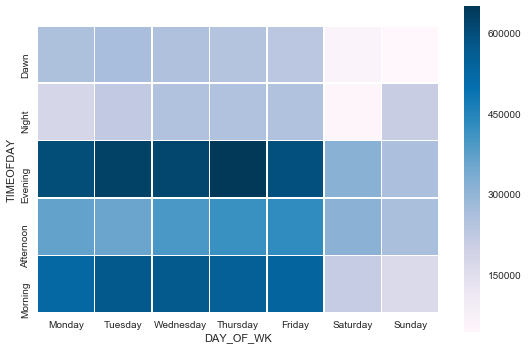

In [55]:
#rank categorical
hubs['DAY_OF_WK'] = pd.Categorical(hubs['DAY_OF_WK'], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
hubs['TIMEOFDAY'] = pd.Categorical(hubs['TIMEOFDAY'], ['Dawn','Night', 'Evening','Afternoon','Morning'])

exits = hubs.pivot_table(index = "TIMEOFDAY", columns = "DAY_OF_WK", values = "DELTA_EXITS",aggfunc='sum')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(exits, annot=False, fmt="n", linewidths=.5, ax=ax,square=True, cmap='PuBu')

In [56]:
(grouped_means
 .sort_values(by=['DAY_OF_WK','TIMEOFDAY', 'DELTA_EXITS'], ascending=[True,True,False])
 .groupby(['DAY_OF_WK','TIMEOFDAY'])
 .head())

,STAT_MERGE,DAY_OF_WK,TIMEOFDAY,DELTA_EXITS
10309,GRD CNTRL-42 ST-4567S,Friday,Afternoon,28037.80
2925,34 ST-HERALD SQ-BDFMNQRW,Friday,Afternoon,25900.60
884,14 ST-UNION SQ-456LNQRW,Friday,Afternoon,21734.60
14878,TIMES SQ-42 ST-1237ACENQRSW,Friday,Afternoon,17109.00
3061,34 ST-PENN STA-ACE,Friday,Afternoon,16990.40
10310,GRD CNTRL-42 ST-4567S,Friday,Dawn,29049.20
885,14 ST-UNION SQ-456LNQRW,Friday,Dawn,18214.40
10003,FULTON ST-2345ACJZ,Friday,Dawn,13843.60
13412,PATH NEW WTC-1,Friday,Dawn,11186.20
2926,34 ST-HERALD SQ-BDFMNQRW,Friday,Dawn,10174.60


In [57]:
hubs_mask2 = ((grouped_means.STAT_MERGE == 'GRD CNTRL-42 ST-4567S') | 
                (grouped_means.STAT_MERGE == 'TIMES SQ-42 ST-1237ACENQRSW') | 
                (grouped_means.STAT_MERGE == '42 ST-PORT AUTH-1237ACENQRSW') |
                (grouped_means.STAT_MERGE == '34 ST-PENN STA-ACE') |
                (grouped_means.STAT_MERGE == '34 ST-PENN STA-123ACE') |
                (grouped_means.STAT_MERGE == '42 ST-PORT AUTH-1237ACEGNRSW'))
no_hubs_means = grouped_means.drop(grouped_means[hubs_mask2].index)

In [58]:
(no_hubs_means
 .sort_values(by=['DAY_OF_WK','TIMEOFDAY', 'DELTA_EXITS'], ascending=[True,True,False])
 .groupby(['DAY_OF_WK','TIMEOFDAY'])
 .head())

,STAT_MERGE,DAY_OF_WK,TIMEOFDAY,DELTA_EXITS
2925,34 ST-HERALD SQ-BDFMNQRW,Friday,Afternoon,25900.60
884,14 ST-UNION SQ-456LNQRW,Friday,Afternoon,21734.60
10002,FULTON ST-2345ACJZ,Friday,Afternoon,14566.40
3980,59 ST COLUMBUS-1ABCD,Friday,Afternoon,12277.20
4014,59 ST-456NQRW,Friday,Afternoon,10723.20
885,14 ST-UNION SQ-456LNQRW,Friday,Dawn,18214.40
10003,FULTON ST-2345ACJZ,Friday,Dawn,13843.60
13412,PATH NEW WTC-1,Friday,Dawn,11186.20
2926,34 ST-HERALD SQ-BDFMNQRW,Friday,Dawn,10174.60
3505,47-50 STS ROCK-BDFM,Friday,Dawn,7943.00


In [66]:
raw = no_hubs[['DAY_OF_WK','STATION','DELTA_EXITS']]
piv = raw.pivot_table(index='STATION', columns='DAY_OF_WK', aggfunc = 'sum')
piv.sort_values(by=('DELTA_EXITS', 'Monday'), ascending=False,inplace=True)
piv.to_csv('/Users/krw252/output.csv')

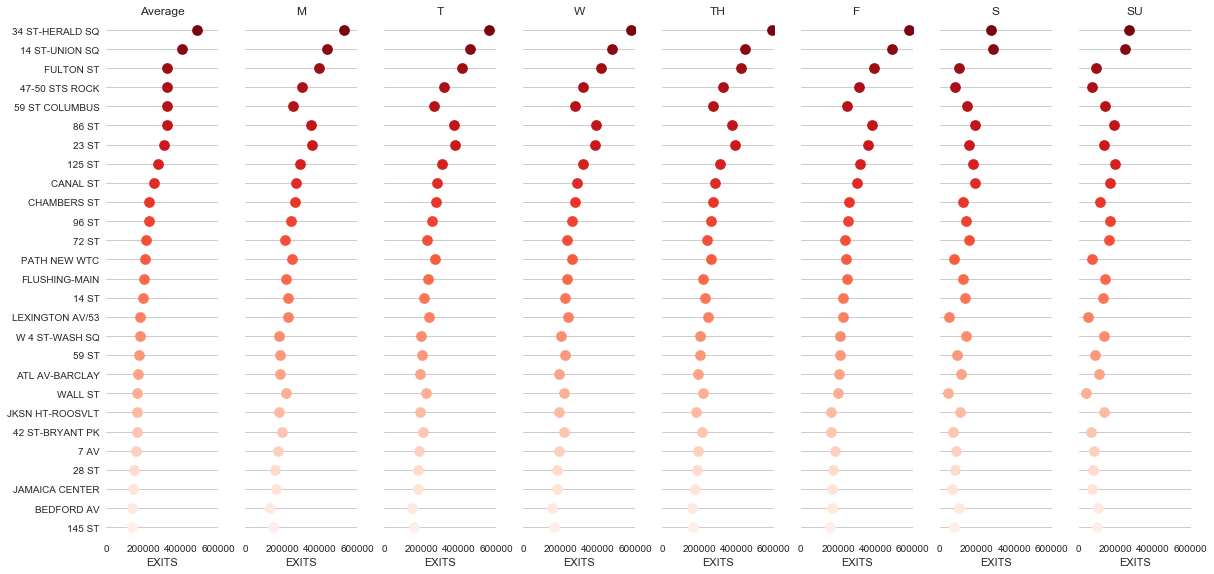

In [81]:
sns.set(style="whitegrid")

path = '/Users/krw252/output_sorted.csv'
data = pd.read_csv(path)

# Make the PairGrid
g = sns.PairGrid(data.sort_values("Avg. Daily", ascending=False),
                 x_vars=data.columns[1:9], y_vars=["STATION"],
                 size=8, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10.75, orient="h",
      palette="Reds_r", edgecolor="gray")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 600000), xlabel="EXITS", ylabel="")

# Use semantically meaningful titles for the columns
titles = ['Average','M','T','W','TH','F','S','SU']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)